In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

PROCESSED_PATH = PROJECT_ROOT / "data" / "processed"
FILE_PATH = PROCESSED_PATH / "labeled_nasa_data.csv"

from src.features import TextMetricCalculator

df = pd.read_csv(FILE_PATH)
print(f"Loaded dataset with {len(df)} records.")

calculator = TextMetricCalculator()

df = calculator.process_dataframe(df, text_column='explanation')

metric_columns = ['word_count', 'char_count', 'avg_word_length', 'sentence_count', 'avg_sentence_length']
display(df[metric_columns].head(5))

Loaded dataset with 1788 records.
Extracting features from column: explanation...


,word_count,char_count,avg_word_length,sentence_count,avg_sentence_length
0,138.0,651.0,4.717391,6.0,23.000000
1,135.0,641.0,4.748148,8.0,16.875000
2,184.0,847.0,4.603261,10.0,18.400000
3,167.0,796.0,4.766467,8.0,20.875000
4,153.0,758.0,4.954248,7.0,21.857143


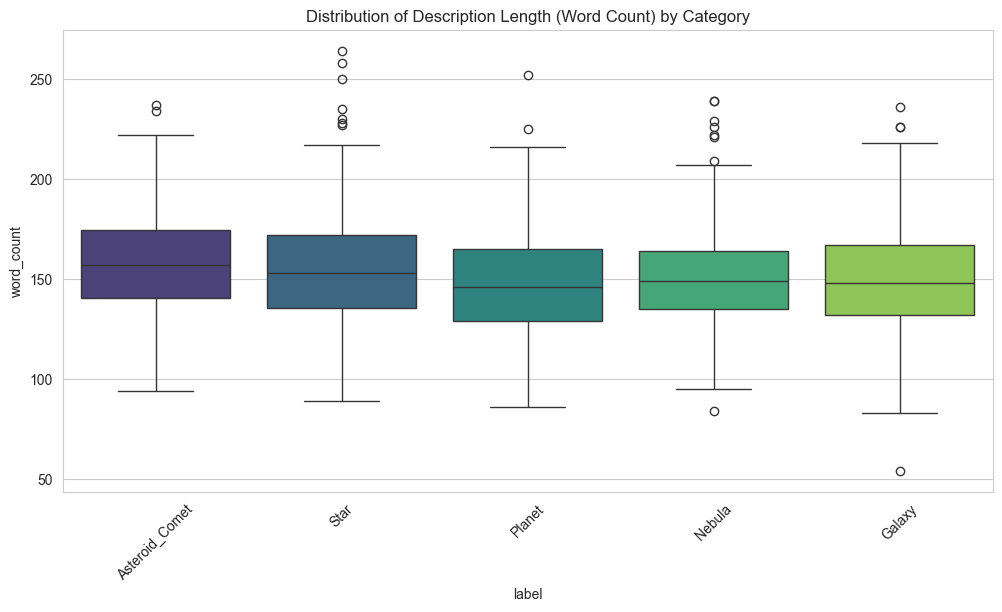

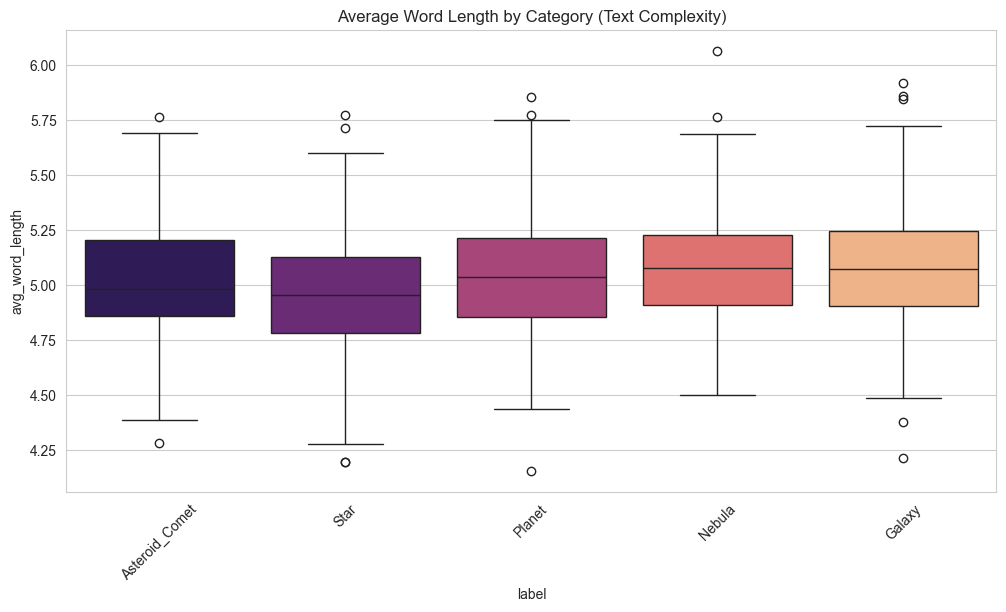

In [ ]:
sns.set_style("whitegrid")

# Comparing Word Count
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='word_count', data=df, palette="viridis", hue='label', legend=False)
plt.title('Distribution of Description Length (Word Count) by Category')
plt.xticks(rotation=45)
plt.show()

# Complexity
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='avg_word_length', data=df, palette="magma", hue='label', legend=False)
plt.title('Average Word Length by Category (Text Complexity)')
plt.xticks(rotation=45)
plt.show()

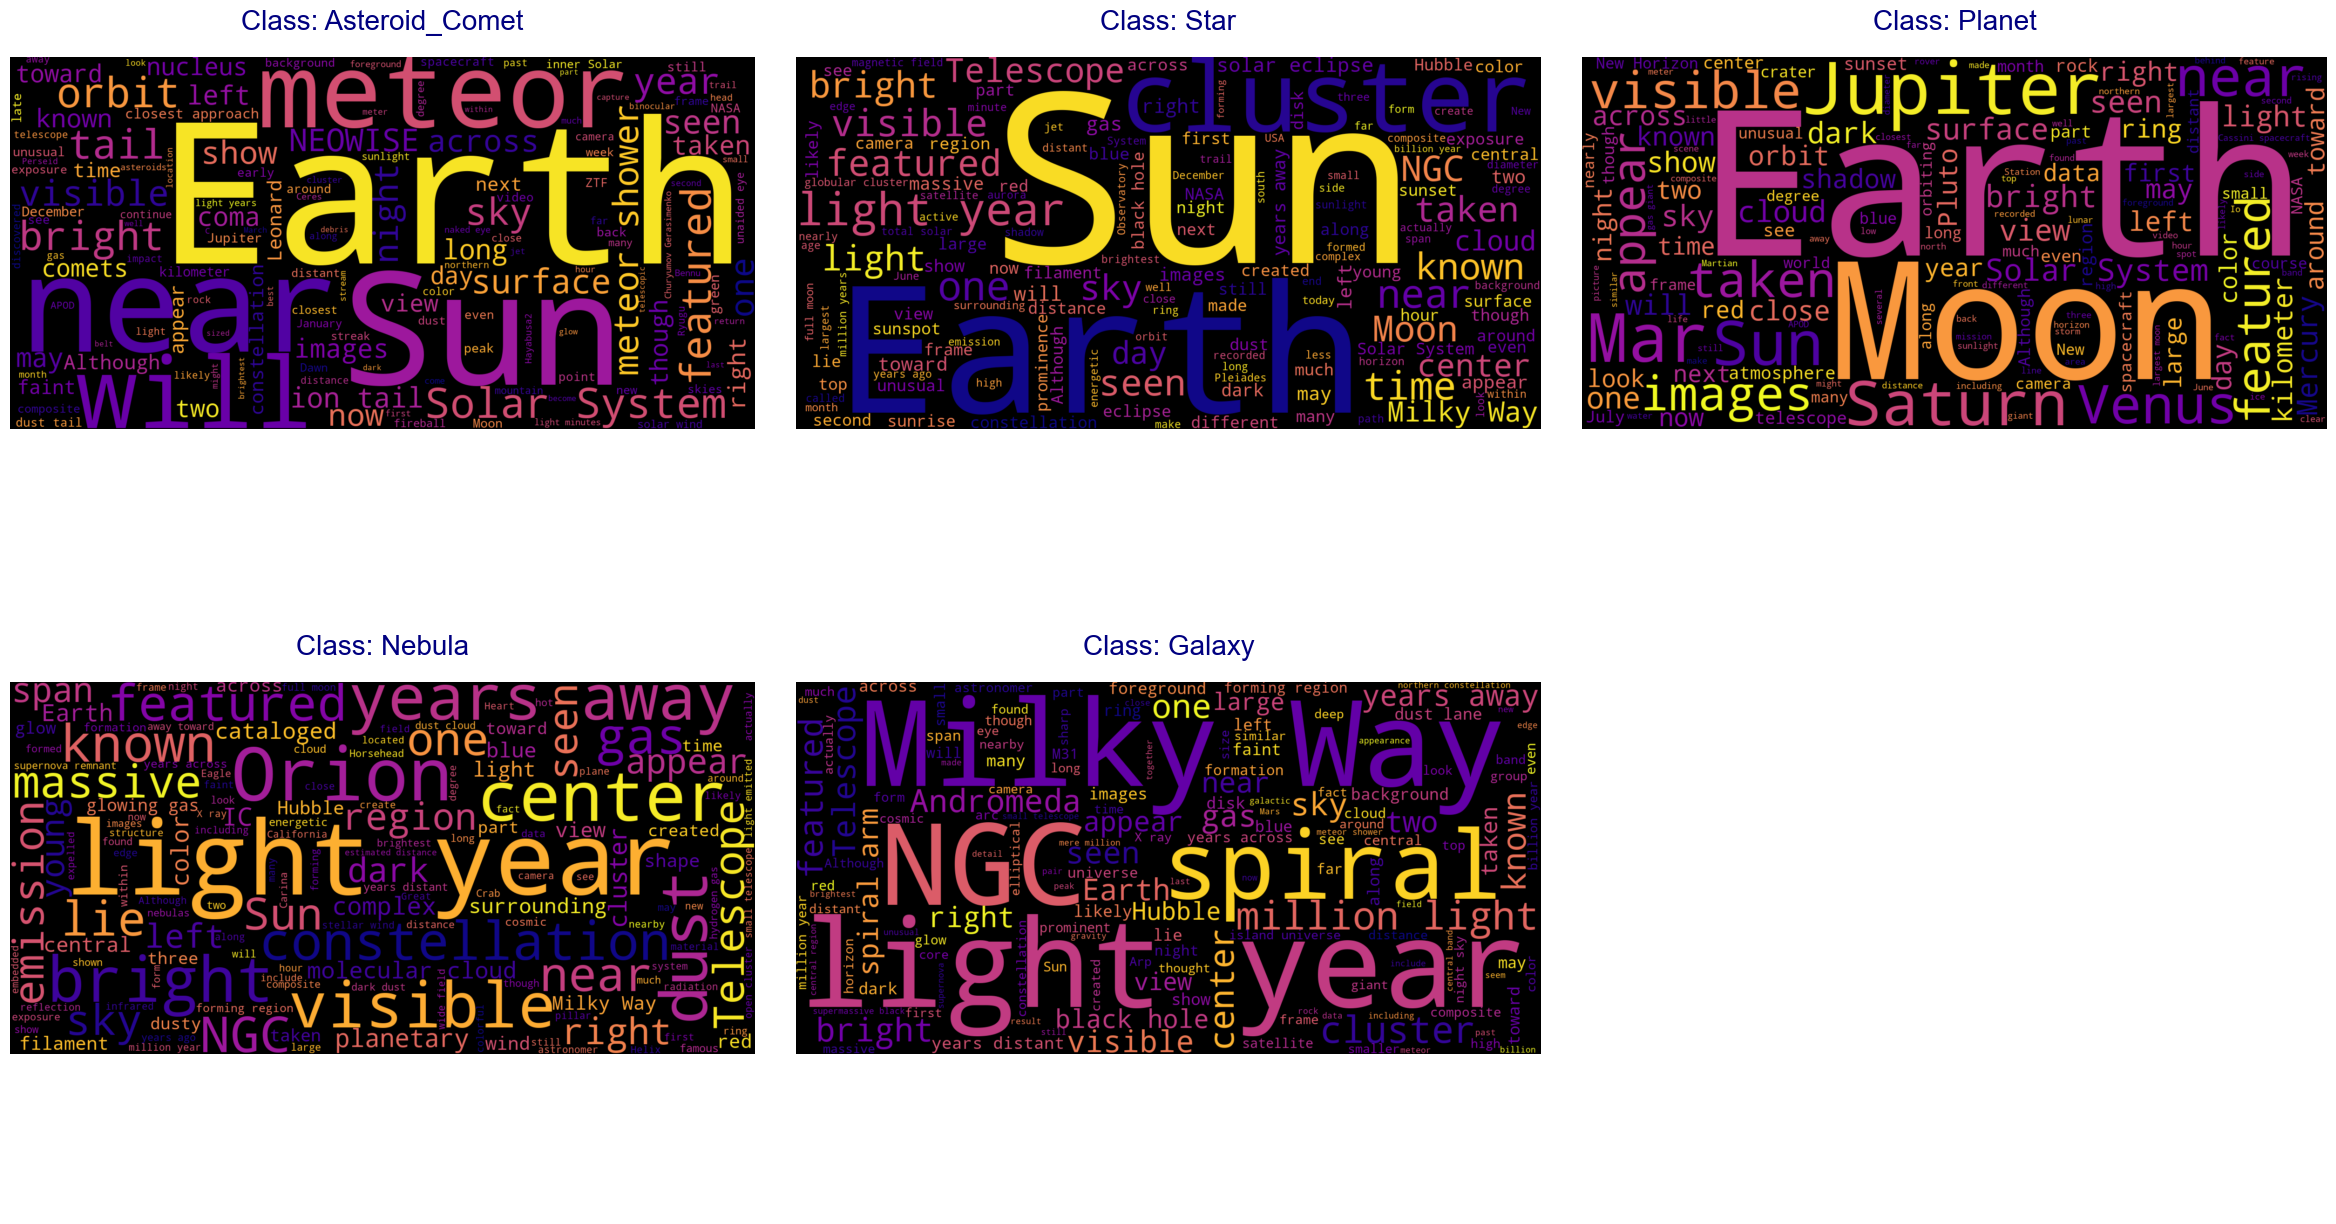

In [7]:
from wordcloud import WordCloud, STOPWORDS

# 1. Define "Spoiler Words" to remove (CRITICAL for model training later)
# If we don't remove these, the model will just look for the word "galaxy" to predict "Galaxy".
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    "galaxy", "galaxies", "planet", "planets", "star", "stars", 
    "nebula", "nebulae", "asteroid", "comet", "image", "photo", 
    "pictured", "captured", "space", "object"
])

fig, axes = plt.subplots(2, 3, figsize=(24, 14)) 
axes = axes.flatten()

for i, label in enumerate(df['label'].unique()):
    text_subset = " ".join(df[df['label'] == label]['explanation'].astype(str))
    
    
    wc = WordCloud(
        width=1600, 
        height=800, 
        background_color='black', 
        colormap='plasma',
        stopwords=custom_stopwords,
        max_words=150
    ).generate(text_subset)
    
    axes[i].imshow(wc, interpolation='bilinear')
    axes[i].set_title(f"Class: {label}", fontsize=20, color='navy', pad=20)
    axes[i].axis('off')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(pad=3.0)
plt.show()

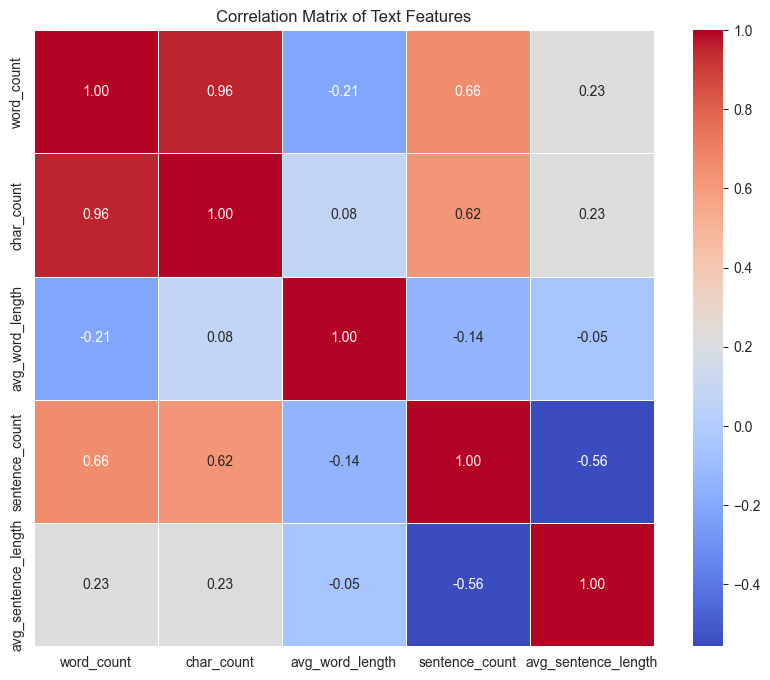

In [4]:
numeric_cols = ['word_count', 'char_count', 'avg_word_length', 'sentence_count', 'avg_sentence_length']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Text Features')
plt.show()

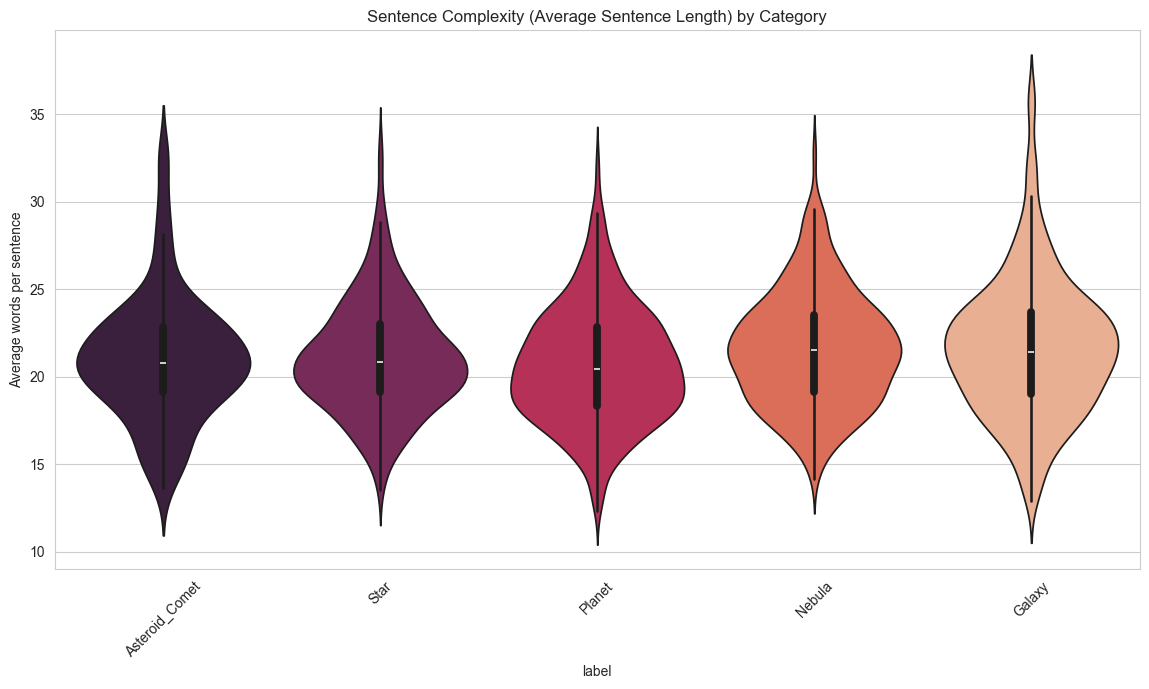

In [5]:
plt.figure(figsize=(14, 7))

sns.violinplot(
    x='label', 
    y='avg_sentence_length', 
    data=df, 
    palette="rocket", 
    hue='label', 
    legend=False
)

plt.title('Sentence Complexity (Average Sentence Length) by Category')
plt.ylabel('Average words per sentence')
plt.xticks(rotation=45)
plt.show()